# Map-matching on a network

## Import de la librairie tracklib

In [1]:
import matplotlib.pyplot as plt
import os
import sys

#-------------------------------------------------------
# Import de tracklib

module_path = os.path.abspath(os.path.join('../../..'))
if module_path not in sys.path:
    sys.path.append(module_path)

## Read GPX data and plot track

100% (171 of 171) |######################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (170 of 170) |######################| Elapsed Time: 0:00:00 Time:  0:00:00


-------------------------------------
GPS track #utgtrack-22245_light of user 0:
-------------------------------------
  Nb of pt(s):   59
  Ref sys id   : ENU
  Starting at  : 12/07/2019 16:44:50
  Ending at    : 12/07/2019 16:49:59
  Duration     : 309.000 s
  Length       : 1696.944 m
-------------------------------------

Loading network...
nb edges= 170
nb nodes= 145
Building [100 x 47] spatial index...


100% (145 of 145) |######################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
  0% (0 of 58) |                         | Elapsed Time: 0:00:00 ETA:  --:--:--

Bounding box: 
 Lower left corner : [E=  665965.533, N= 6837735.050, U=      81.000]
 Upper right corner: [E=  667285.070, N= 6838277.184, U=      82.730]
Computing all pairs shortest distances...
Map-matching preparation...
Compilation of states on track
Cost and marker matrix initialization
Compilation of observations on track
Optimal sequence computation


100% (58 of 58) |########################| Elapsed Time: 0:00:00 Time:  0:00:00
100% (59 of 59) |########################| Elapsed Time: 0:00:00 Time:  0:00:00


Backward reconstruction phase


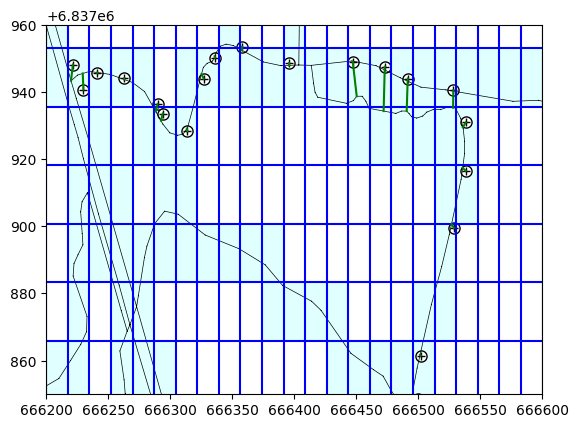

In [3]:
import matplotlib.pyplot as plt

# On charge les données
from tracklib.core.ObsTime import ObsTime
from tracklib.io.TrackReader import TrackReader
from tracklib.io.NetworkReader import NetworkReader
from tracklib.core.SpatialIndex import SpatialIndex
import tracklib.algo.Mapping as mapping


ObsTime.setReadFormat("4Y-2M-2DT2h:2m:2sZ")

#path = '/home/marie-dominique/DATA/GPX/utagawavtt/utgtrack-22245.gpx'
path = '/home/marie-dominique/tracklib/tracklib/data/gpx/utgtrack-22245_light.gpx'
netpath = '/home/marie-dominique/tracklib/tracklib/data/network/network_22245_light_2154.csv'

# ================================================================

tracks = TrackReader.readFromGpx(path, srid='ENU')
trace = tracks.getTrack(0)
trace.summary()

network = NetworkReader.readFromFile(netpath, formatfile = 'TEST3')
print ('nb edges=', len(network.EDGES))
print ('nb nodes=', len(network.NODES))


si = SpatialIndex(network) #, resolution=[5,1], margin=0.15)
network.spatial_index = si


trace.plotAsMarkers(append=True)
network.plot('k-', '', 'g-', 'r-', 0.5, plt)
si.plot(base=False, append=True)

emprise = trace.bbox()
print (emprise)
plt.xlim([666200, 666600])
plt.ylim([6837850, 6837960])  #6837825
#plt.ylim([68378, 68380])

network.prepare()

mapping.mapOnNetwork(trace, network, search_radius=25, debug=False)

plt.show()
